# Open Core Data Service Playground

## About:
A simple notebook to begin to review some of the elements needed in such documents.  

In [1]:
# Core imports
import matplotlib
import warnings
from mpl_toolkits.basemap import Basemap
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
warnings.filterwarnings('ignore')
%matplotlib inline
matplotlib.style.use('ggplot')
import json, requests

The following cell pulls in the GeoJSON representation for leg 165.  It is parsed and plotted.  Some elements to work on:

* Need the map to be zoomed in on a region closer to the bounding boxes of the features
* Need these as a library call to simply generate the map
* Something like:  ```ocdPlot(leg:"165", site:"1000")``` or just leg or full LSH
* Need to review mapping CSDCO features

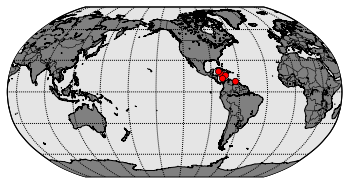

In [2]:
url = 'http://opencoredata.org/api/v1/spatial/expedition/165'
r = requests.get(url=url)
data = r.json()

longs, lats = [], []
for feature in data['features']:
    geom = feature['geometry']['coordinates']
   
for point in geom:
    longs.append(float(point[0]))
    lats.append(float(point[1]))
    
eq_map = Basemap(projection='robin', resolution = 'l', area_thresh = 1000.0,
              lat_0=0, lon_0=-130)
eq_map.drawcoastlines()
eq_map.drawcountries()
eq_map.fillcontinents(color = 'gray')
eq_map.drawmapboundary()
eq_map.drawmeridians(np.arange(0, 360, 30))
eq_map.drawparallels(np.arange(-90, 90, 30))

xx,yy = eq_map(longs, lats)
eq_map.plot(xx, yy, 'ro', markersize=6)
plt.show()

The following cell demonstrates some of the elements that need to be addressed.
* We need to be able to import data into a dataframe by a simple leg (or Leg Site Hole, or CSDCO project) and measurement type.

So for example we would have something like 

```df = ocdLoadData(lsh:"165_1000B", measurement:"P-wave")```

In [3]:
import pandas as pd
df = pd.read_csv('http://localhost:6789/api/v1/documents/download/165_1000B_JanusPws3Section_RulqNjQu.csv',
                  delimiter="\t")

df.info()
# Or use the list command for just the names
# list(df.columns.values)  

# One could also do selects on certain columns too
#dfselect = df[['Depth_mbsf', 'Velocity']]
#dfselect[0:5]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 48 entries, 0 to 47
Data columns (total 33 columns):
Leg                      48 non-null int64
Site                     48 non-null int64
Hole                     48 non-null object
Core                     48 non-null int64
Core_type                48 non-null object
Section_number           48 non-null int64
Section_type             48 non-null object
Top_cm                   48 non-null int64
Bot_cm                   48 non-null int64
Depth_mbsf               48 non-null int64
Section_id               48 non-null int64
Direction                48 non-null object
Velocity                 48 non-null int64
Run_number               48 non-null int64
Run_timestamp            0 non-null float64
Core_temperature         0 non-null float64
Liner_correction         0 non-null float64
Raw_data_collected       0 non-null float64
Standard_name            0 non-null float64
Standard_set_name        0 non-null float64
Expected_velocity        0 

It's easy to plot with Panda's.  However, where are the units?  Pat has worked up the units and I have it in the metadata (CSVW based) so we just need to route it into here.

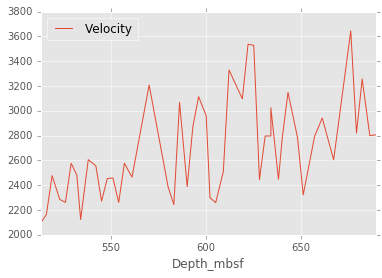

In [5]:
# Plot Velocity vs depth (pehaps do as type="scatter" too)
df.plot(x='Depth_mbsf', y='Velocity')